In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

generating dataset

In [6]:
X = np.random.rand(100, 1) - 0.5
y = 2*X[:, 0]**3 + 0.04 * np.random.randn(100)

In [7]:
df = pd.DataFrame()

In [8]:
df['X'] = X.reshape(100)
df['y'] = y
     

In [9]:
df.head()

,X,y
0,0.196756,0.025928
1,-0.338112,-0.084681
2,0.219030,-0.020893
3,-0.033977,0.050455
4,-0.037648,-0.018181


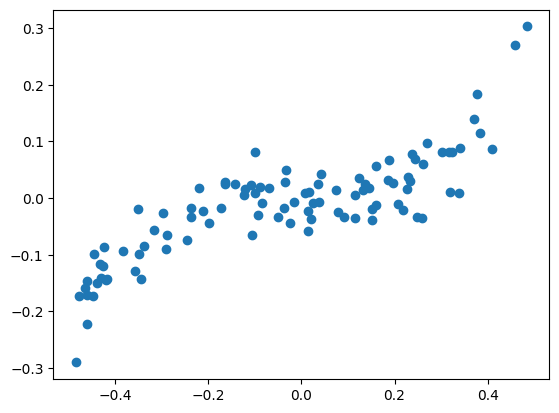

In [10]:
plt.scatter(df['X'],df['y'])

pred 1 and residual 1

In [20]:

df['pred1'] = df['y'].mean()
df.head()

,X,y,pred1
0,0.196756,0.025928,-0.013566
1,-0.338112,-0.084681,-0.013566
2,0.219030,-0.020893,-0.013566
3,-0.033977,0.050455,-0.013566
4,-0.037648,-0.018181,-0.013566


In [21]:
df['res1'] = df['y'] - df['pred1']
df.head()

,X,y,pred1,res1
0,0.196756,0.025928,-0.013566,0.039495
1,-0.338112,-0.084681,-0.013566,-0.071115
2,0.219030,-0.020893,-0.013566,-0.007326
3,-0.033977,0.050455,-0.013566,0.064022
4,-0.037648,-0.018181,-0.013566,-0.004615


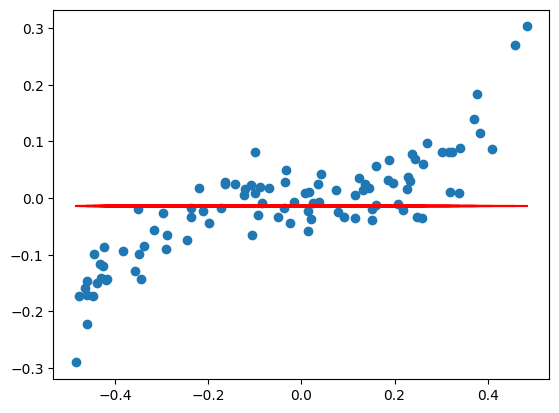

In [22]:

plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [23]:

from sklearn.tree import DecisionTreeRegressor

In [24]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)
     

DecisionTreeRegressor(max_leaf_nodes=8)

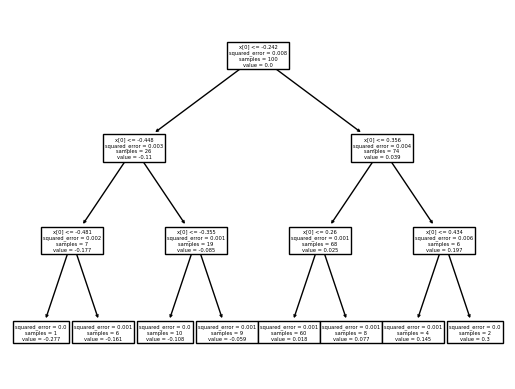

In [26]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()
     

 generating X_test

In [27]:

X_test = np.linspace(-0.5, 0.5, 500)

pred2 and residual 2

In [29]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))
df['res2'] = df['y'] - df['pred2']

In [30]:
df.head()

,X,y,pred1,res1,pred2,res2
0,0.196756,0.025928,-0.013566,0.039495,0.283095,-0.257166
1,-0.338112,-0.084681,-0.013566,-0.071115,0.205967,-0.290648
2,0.219030,-0.020893,-0.013566,-0.007326,0.283095,-0.303987
3,-0.033977,0.050455,-0.013566,0.064022,0.283095,-0.232640
4,-0.037648,-0.018181,-0.013566,-0.004615,0.283095,-0.301276


In [35]:

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [36]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

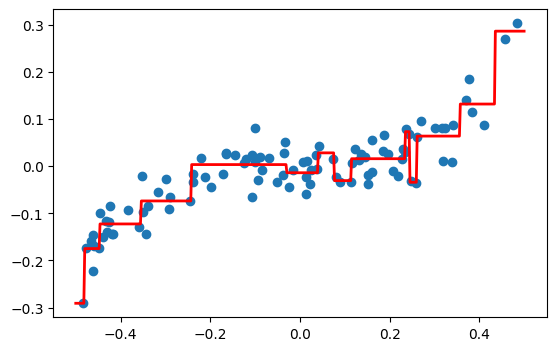

In [37]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

#GDBoosting Class

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

def gradient_boost(X, y, number, lr=1, count=1, regs=[], foo=None):
    if number == 0:
        return
    else:
        # Calculate residuals
        if count > 1:
            y_residual = y - sum(lr * regressor.predict(X) for regressor in regs)
        else:
            y_residual = y  # First iteration, no residuals, use original target values

        # Train a new regressor
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y_residual)

        # Append the trained model to the list of regressors
        regs.append(tree_reg)

        # Generate predictions for plotting
        x1 = np.linspace(-0.5, 0.5, 500)
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

        print(f"Iteration: {number}")

        # Plot the results
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2, label="Gradient Boosting Prediction")
        plt.scatter(X[:, 0], foo, color='red', label="True values")
        plt.legend()
        plt.show()

        # Recursively call the function to train the next model
        gradient_boost(X, y, number - 1, lr, count + 1, regs, foo=foo)

In [43]:
# Create synthetic data
X = np.random.rand(100, 1) - 0.5
y = 2 * X[:, 0]**3 + 0.04 * np.random.randn(100)

7


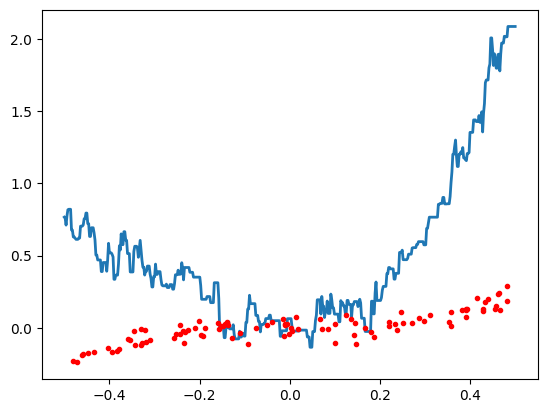

6


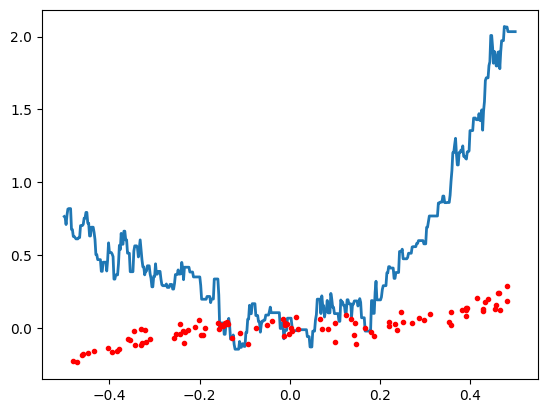

5


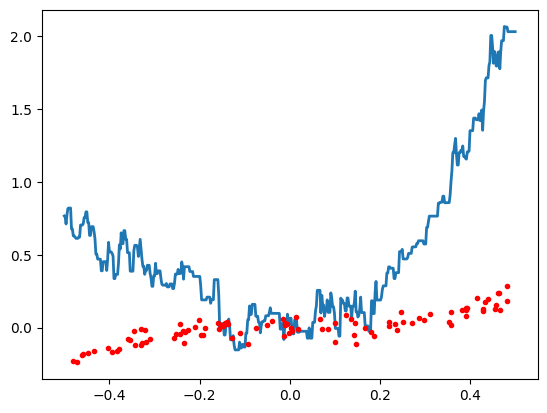

4


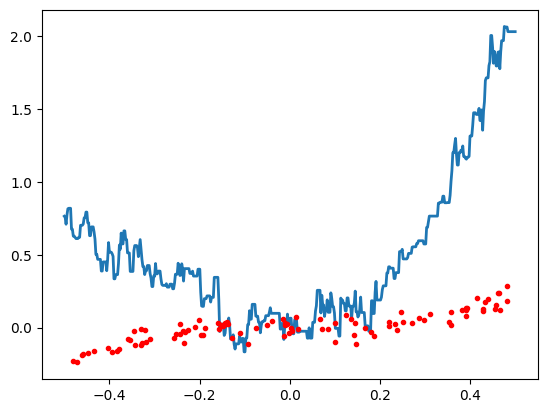

3


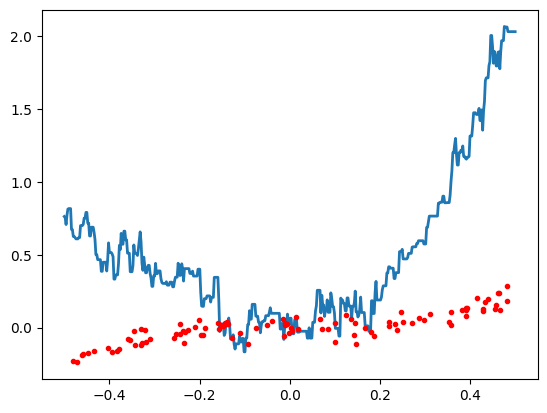

2


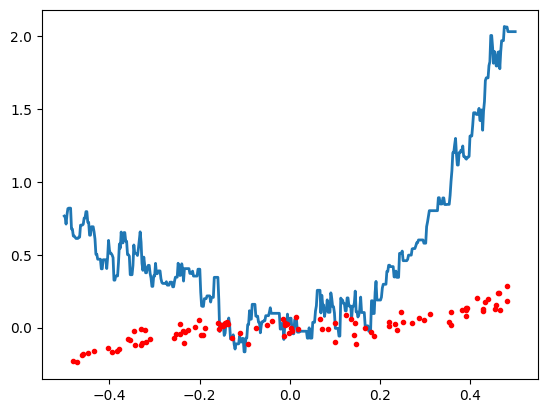

1


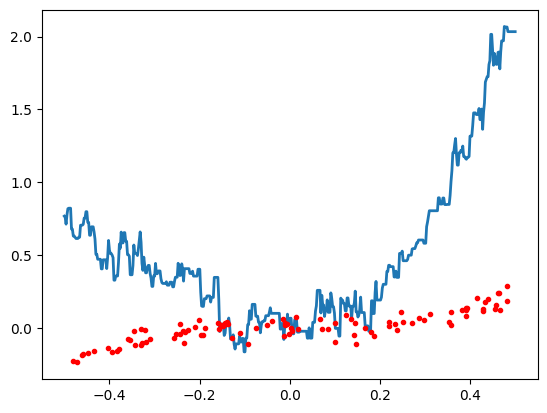

In [44]:
# Start the gradient boosting process
gradient_boost(X, y, number=7, lr=1)